In [44]:
from math import*
import __main__
global PI
import os
import time
PI=float(acos(-1))

import random
import numpy as np
import multiprocessing as mp

random.seed(123)

data_size = 10000;

arr = np.random.randint(1, 10, size=[data_size, 8])
data_input = arr.tolist()
datasets = data_input

def ssh(num):
#     global datasets
#     arr = np.random.randint(1, 10, size=[data_size, 8])
#     datasets = arr.tolist()
    ply_angle = datasets[num]
    
    bas_ply=[-60, -45, -30, -15, 0, 15, 30, 45, 60, 90]

    AA1=bas_ply[ply_angle[0]]
    AA2=bas_ply[ply_angle[1]]
    AA3=bas_ply[ply_angle[2]]
    AA4=bas_ply[ply_angle[3]]
    AA5=bas_ply[ply_angle[4]]
    AA6=bas_ply[ply_angle[5]]
    AA7=bas_ply[ply_angle[6]]
    AA8=bas_ply[ply_angle[7]]

    ### ply stacking sequence###
    AAA=[AA1/180.0*PI,AA2/180.0*PI,AA3/180.0*PI,AA4/180.0*PI,AA5/180.0*PI,AA6/180.0*PI,AA7/180.0*PI,AA8/180.0*PI,AA8/180.0*PI,AA7/180.0*PI,AA6/180.0*PI,AA5/180.0*PI,AA4/180.0*PI,AA3/180.0*PI,AA2/180.0*PI,AA1/180.0*PI]
    pi=3.14159265358979

    R=250.0   ##  radius##
    H=510.0   ##  Height##
    td=0.125  #layer thickness##

    TTT=[-td*8,-td*7,-td*6,-td*5,-td*4,-td*3,-td*2,-td*1,td*0,td*1,td*2,td*3,td*4,td*5,td*6,td*7,td*8]

    ###material property###

    E1=123550.0  
    E2=8707.9
    G12=5695.0
    miu12=0.31946

    miu21=miu12*E2/E1
    Q11=E1/(1-miu12*miu21)
    Q12=miu21*E1/(1-miu12*miu21)
    Q22=E2/(1-miu12*miu21)
    Q66=G12

    A11=0.0
    A12=0.0
    A22=0.0
    A66=0.0

    D11=0.0
    D12=0.0
    D22=0.0
    D66=0.0

    for i in range(0,16):
        A11=A11+(Q11*cos(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*sin(AAA[i])**4)*(TTT[i+1]-TTT[i])
        A12=A12+((Q11+Q22-4*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q12*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]-TTT[i])
        A22=A22+(Q11*sin(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*cos(AAA[i])**4)*(TTT[i+1]-TTT[i])
        A66=A66+((Q11+Q22-2*Q12-2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q66*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]-TTT[i])
        D11=D11+(Q11*cos(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*sin(AAA[i])**4)*(TTT[i+1]**3-TTT[i]**3)/3.0
        D12=D12+((Q11+Q22-4*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q12*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]**3-TTT[i]**3)/3.0
        D22=D22+(Q11*sin(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*cos(AAA[i])**4)*(TTT[i+1]**3-TTT[i]**3)/3.0
        D66=D66+((Q11+Q22-2*Q12-2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q66*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]**3-TTT[i]**3)/3.0

    #####bianliang########

    D= 2*R
    L= H

    #xian
    a=[[A11,A12,0],[A12,A22,0],[0,0,A66]]
    b=[[0,0,0],[0,0,0],[0,0,0]]
    d=[[D11,D12,0],[D12,D22,0],[0,0,D66]]

    alpha=PI/L
    beta=2/D

    mm=50
    nn=50
    kmm=0
    knn=0
    kmm11=0
    knn11=0
    F=[[0 for col in range(nn)] for row in range(mm)]
    Fcr=1e16

    for m in range(1,mm+1):
        for n in range(1,nn+1):
            xi11=2*a[0][0]*(m*alpha)**2+2*a[2][2]*(n*beta)**2
            xi12=2*(a[0][1]+a[2][2])*m*alpha*n*beta
            xi13=4*a[0][1]*m*alpha/D-2*b[0][0]*(m*alpha)**3-2*(b[0][1]+2*b[2][2])*m*alpha*(n*beta)**2
            xi22=2*a[1][1]*(n*beta)**2+2*a[2][2]*(m*alpha)**2
            xi23=4*a[1][1]*n*beta/D-2*b[1][1]*(n*beta)**3-2*(b[0][1]+2*b[2][2])*(m*alpha)**2*n*beta
            xi33=4*(d[0][1]+2*d[2][2])*(m*alpha*n*beta)**2+8*a[1][1]/(D**2)\
            +2*d[0][0]*(m*alpha)**4+2*d[1][1]*(n*beta)**4-8*(b[1][1]*(n*beta)**2+b[0][1]*(m*alpha)**2)/D
            xi21=xi12
            xi31=xi13
            xi32=xi23
            det1=xi11*(xi22*xi33-xi32*xi23)-xi12*(xi21*xi33-xi31*xi23)+xi13*(xi21*xi32-xi31*xi22)
            det2=xi11*xi22-xi21*xi12
            Nx=det1/det2/(2*((m*alpha)**2))
            F[m-1][n-1]=Nx*PI*D
            if Fcr>F[m-1][n-1]:
              Fcr=F[m-1][n-1]
              kmm=m
              knn=2*n

    for m in range(1,mm+1):
        xi11=2*a[0][0]*(m*alpha)**2
        xi12=0
        xi13=4*a[0][1]*m*alpha/D-2*b[0][0]*(m*alpha)**3
        xi22=2*a[2][2]*(m*alpha)**2
        xi23=0
        xi33=8*a[1][1]/(D**2)+2*d[0][0]*(m*alpha)**4-8*b[0][1]*(m*alpha)**2/D
        xi21=xi12
        xi31=xi13
        xi32=xi23
        det1=xi11*(xi22*xi33-xi32*xi23)-xi12*(xi21*xi33-xi31*xi23)+xi13*(xi21*xi32-xi31*xi22)
        det2=xi11*xi22-xi21*xi12
        Nx=det1/det2/(2*((m*alpha)**2))
        Fn1=Nx*PI*D
        if Fcr>Fn1:
          Fcr=Fn1
          kmm=m
          knn=1

    return Fcr


# map async parallel 
# pool = mp.Pool(mp.cpu_count())
pool = mp.Pool(processes = 8)

start = time.time()
results_map = pool.map(ssh, range(data_size))
end = time.time() 
print(end - start) #0.0037827491760253906
# print(results_map)


28.08298921585083


Process ForkPoolWorker-41:
Process ForkPoolWorker-47:
Process ForkPoolWorker-48:
Process ForkPoolWorker-46:
Process ForkPoolWorker-45:
Process ForkPoolWorker-44:
Process ForkPoolWorker-43:
Process ForkPoolWorker-42:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/7jz/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/7jz/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/7jz/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/7jz/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/7jz/anaconda3/lib/python3.6/multiprocessing/p

# Data preprocessing

In [140]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

results_map_sort = sorted(results_map) # note that sorted change the sort but didn't change the original one
# print(results_map_sort)
median_value = results_map_sort[data_size//2]
print(median_value)

results_map_new = np.zeros((data_size,1))
# print(type(results_map))
output_scikit = np.zeros(data_size)

for i in range(data_size):
    if results_map[i] > median_value:
        results_map_new[i,:] = 1
        output_scikit[i] = 1
    else:
        results_map_new[i,:] = 0
        output_scikit[i] = 0
        
# print(results_map) # new results_map transfer to [0,1]
# print(datasets)
# type(datasets)
# type(results_map)

X = torch.FloatTensor(datasets)
Y = torch.FloatTensor(results_map_new)
# type(data_tensor)
#type(output_tensor)
print(X.size())
print(Y.size())
# print(X)
# print(Y)


print(type(datasets))
print(type(output_scikit))

598326.738679199
torch.Size([10000, 8])
torch.Size([10000, 1])
<class 'list'>
<class 'numpy.ndarray'>


# Training by classification 

In [46]:
# from sklearn import svm
# from sklearn.model_selection import cross_val_score

# clf = svm.SVC(gamma=0.001,probability=True)
# X = datasets
# y = results_map

# clf.fit(X, y) 

# score_svm = cross_val_score(clf, X, y, scoring='recall_macro',cv=5)  
# print(score_svm)

# clf.predict([datasets[3]])
# clf.predict_proba([datasets[3]])

In [157]:
# scikit-learn MLP training 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn import preprocessing

# preprocessing data 

X_scale = preprocessing.scale(datasets)
# print(X_scale)

# sgd optimizer 
mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4, hidden_layer_sizes=(100,100),
                    learning_rate='adaptive', random_state=1, max_iter=500,verbose=True)

# lbfgs - very slow 
# mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100),
#                     random_state=1,max_iter=50,verbose=10,learning_rate_init=.1)

# adam 
# mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100),
#                     random_state=1,max_iter=50,verbose=10,learning_rate_init=.1)

mlp.fit(X_scale, output_scikit) 
print(mlp.classes_)
print(mlp.n_layers_)
print(mlp.n_iter_)
print(mlp.loss_)
print(mlp.out_activation_)
print(mlp.n_outputs_)

score_mlp = cross_val_score(mlp, X_scale, output_scikit, scoring='recall_macro',cv=5)  
print(score_svm)



Iteration 1, loss = 0.70750428
Iteration 2, loss = 0.68525905


/Users/7jz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[0. 1.]
4
2
0.68525905140777
logistic
1
Iteration 1, loss = 0.71105447
Iteration 2, loss = 0.69025022


/Users/7jz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 3, loss = 0.67906655
Iteration 4, loss = 0.67102537Iteration 1, loss = 0.71058414
Iteration 2, loss = 0.68956694
Iteration 3, loss = 0.67839425


/Users/7jz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 4, loss = 0.67026259
Iteration 1, loss = 0.71054707
Iteration 2, loss = 0.68999699
Iteration 3, loss = 0.67908270


/Users/7jz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.71040751
Iteration 2, loss = 0.69001552
Iteration 3, loss = 0.67922617


/Users/7jz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 4, loss = 0.67153231
Iteration 1, loss = 0.70987896
Iteration 2, loss = 0.68891258
Iteration 3, loss = 0.67772354
Iteration 4, loss = 0.66797868
Iteration 5, loss = 0.66076309
Iteration 6, loss = 0.65432497
Iteration 7, loss = 0.64836822
Iteration 8, loss = 0.64320504
Iteration 9, loss = 0.63835642
Iteration 10, loss = 0.63460358
Iteration 11, loss = 0.63077928
Iteration 12, loss = 0.62718790
Iteration 13, loss = 0.62381456
Iteration 14, loss = 0.62077123
Iteration 15, loss = 0.61761712
Iteration 16, loss = 0.61554307
Iteration 17, loss = 0.61356642
Iteration 18, loss = 0.61179003
Iteration 19, loss = 0.60989857
Iteration 20, loss = 0.60835301
Iteration 21, loss = 0.60761748
Iteration 22, loss = 0.60610221
Iteration 23, loss = 0.60471352
Iteration 24, loss = 0.60338649
Iteration 25, loss = 0.60247688
Iteration 26, loss = 0.60120829
Iteration 27, loss = 0.60008965
Iteration 28, loss = 0.59934287
Iteration 29, loss = 0.59812438
Iteration 30, loss = 0.59718856
Iteration 31, loss

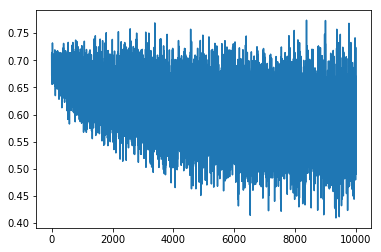

In [100]:
# pytorch binary classification 

class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 8)
        self.relu1 = nn.ReLU()
        
        self.dout = nn.Dropout(0.2) # previous one is 0.2 
        
        self.fc2 = nn.Linear(8, 64) # can be adjusted 
#         self.prelu = nn.PReLU(1)
        self.relu2 = nn.ReLU()
        
        self.out = nn.Linear(64, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        
        dout = self.dout(h1)
#         a2 = self.fc2(h1)
        a2 = self.fc2(dout)
#         h2 = self.prelu(a2)
        h2 = self.relu2(a2)
        
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y
    
net = Net()
# opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999)) # turing the learn rate? 
opt = optim.RMSprop(net.parameters(), lr=0.001) # turing the learn rate? 

criterion = nn.BCELoss()

def train_epoch(model, opt, criterion, batch_size=50): # batch_size = 50
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses


e_losses = []
num_epochs = 50
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)

In [50]:
# x_t = Variable(torch.randn(1, 8))
# print(net(x_t))
# x_1_t = Variable(torch.randn(1, 8) + 2)
# print(net(x_1_t))